# Imports

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
%matplotlib inline 
#  !pip3 install mpld3
# import mpld3
#pld3.enable_notebook() causes plotting to not work???

from scipy.integrate import odeint
# !pip3 install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian, exponential

from time import time
import warnings
warnings.filterwarnings('ignore')
# JSM added
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

In [2]:
from Cluster import * 

In [3]:
bd = BaseData('data_all_base')

reading in data from data_all_base ...
elapsed:  7.954850912094116


In [4]:
# clusdtypes should be in ['JRP1','ORP1','JWP1','OWP1','JRT1','ORT1','JWT1','OWT1']
# database JHU/OWID  (J/O) 
# report_correct T or F   (R/W)
# syncat peak/thresh  (P/T)
clusdtype='JRT1'
ClData = get_cluster_data(clusdtype)

reading in data from ./pks/data_cluster_JRT1.pk ...


In [5]:
# changed to use model_fits_age : this is backwards compatible and only loads data if needed
# neither model_fits.py nor model_fits_nodata.py now required
# from model_fits_nodata import *  # including ModelFit class definition.
import data_config
data_config.data_loaded = True    
from model_fits_age import *  # including ModelFit class definition. 

data already loaded, so no "from data import *" required.
making the models...
SEI3R
SC3EI3R
SC3UEI3R
done with the models.


In [6]:
# eliminate countries with no population data (needed for normalizing death stats for fits)

#for country in countries:
#    if population_owid[country][0] == 0:
#        print(country)
        
countries = [cc for cc in bd.countries_common if bd.population_owid[cc][-2] > 0]
print(len(countries),'countries with population data')
countries_zp = [cc for cc in bd.countries_common if bd.population_owid[cc][-2] == 0]
print('common countries without population data',countries_zp)
cluster_countries = [c for c in ClData.clusdata_all['deaths']]
print(len(cluster_countries),'cluster countries')


187 countries with population data
common countries without population data []
87 cluster countries


# Test Scan class

In [72]:
#  for debugging class methods without having to reload all of model_fits.py:
#  file containing only ModelFit class, 
exec(open('ModelFit.py','r').read())

In [8]:
short_countries = ['United States','Spain','Peru','Italy','Germany','Sweden','Iran','Russia']
short_countries = ['United States','Spain','Peru']

In [9]:
pinit = {"beta_1": (0.2, 0., 2.),
         "mu": (.1,0.,.2),
         "c_0": (0.1, 0., 1.0),
         "c_1": (0.07, 0.0, 0.5),
         "c_2": (5., 2.,20.),
         "logI_0": (-6.,-10.,0.0)}

foo = Scan(countries=short_countries,params_init_min_max=pinit, modelname='SC3EI3R',
           basedata=bd,data=bd.covid_owid_ts,run_id='_short',new=True,data_src='owid') # run_id labels parameter dump files



0 United States
1 Spain
2 Peru


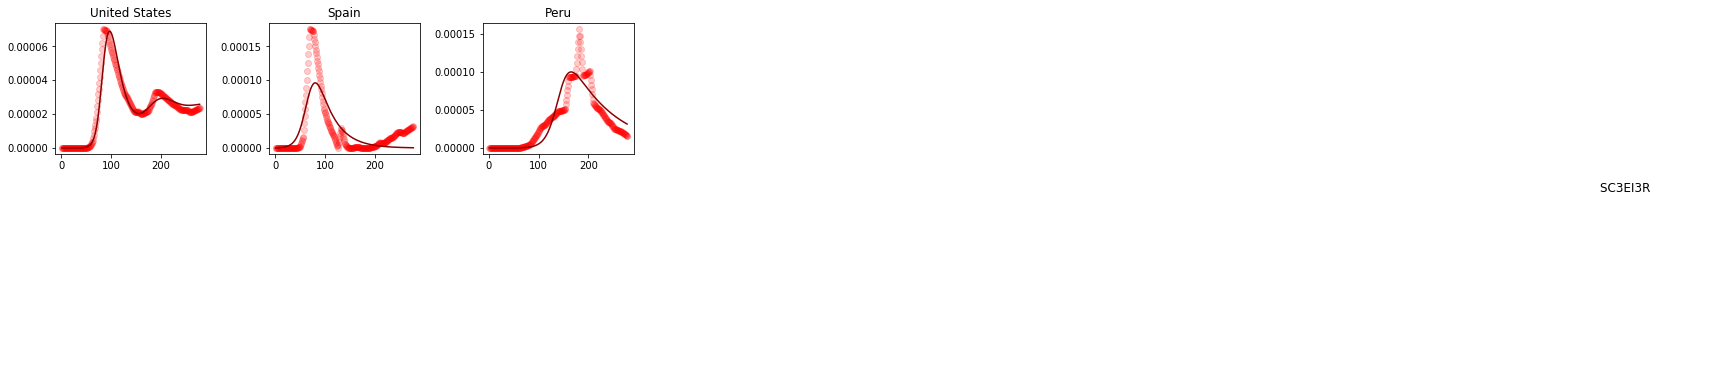

Total elapsed time for  3 countries: 7.6992480754852295
Time per country: 2.566416025161743


In [10]:
foo.scan()

In [11]:
foo.run_id

'SC3EI3R_short_scan'

# Scan with SEI3R fit

**Deaths only**

In [12]:
len(cluster_countries)

87

In [73]:
pinit = {"beta_1": (0.2, 0., 0.8),
         "mu": (.1,0.,.2),
         "logI_0": (-6.,-10.,-5.0)}

SEI3Rscan = Scan(countries=cluster_countries,params_init_min_max=pinit, modelname='SEI3R', basedata=bd,data=bd.covid_owid_ts,run_id='_cluster',new=True,data_src='owid')

0 Afghanistan
1 Albania
2 Algeria
3 Argentina
4 Armenia
5 Austria
6 Azerbaijan
7 Bahrain
8 Bangladesh
9 Belarus
10 Belgium
11 Bolivia
12 Bosnia and Herzegovina
13 Brazil
14 Bulgaria
15 Cameroon
16 Chile
17 Colombia
18 Costa Rica
19 Croatia
20 Czech Republic
21 Denmark
22 Dominican Republic
23 Ecuador
24 Egypt
25 El Salvador
26 Finland
27 France
28 Germany
29 Ghana
30 Greece
31 Guatemala
32 Haiti
33 Honduras
34 Hungary
35 India
36 Indonesia
37 Iran
38 Iraq
39 Ireland
40 Israel
41 Italy
42 Japan
43 Kazakhstan
44 Kenya
45 South Korea
46 Kosovo
47 Kuwait
48 Kyrgyzstan
49 Lebanon
50 Malaysia
51 Mexico
52 Moldova
53 Morocco
54 Netherlands
55 Macedonia
56 Norway
57 Oman
58 Pakistan
59 Panama
60 Paraguay
61 Peru
62 Philippines
63 Poland
64 Portugal
65 Qatar
66 Romania
67 Russia
68 Saudi Arabia
69 Senegal
70 Serbia
71 South Africa
72 Spain
73 Sudan
74 Sweden
75 Switzerland
76 Tunisia
77 Turkey
78 United States
79 Ukraine
80 United Arab Emirates
81 United Kingdom
82 Uzbekistan
83 Venezuela
84 Ye

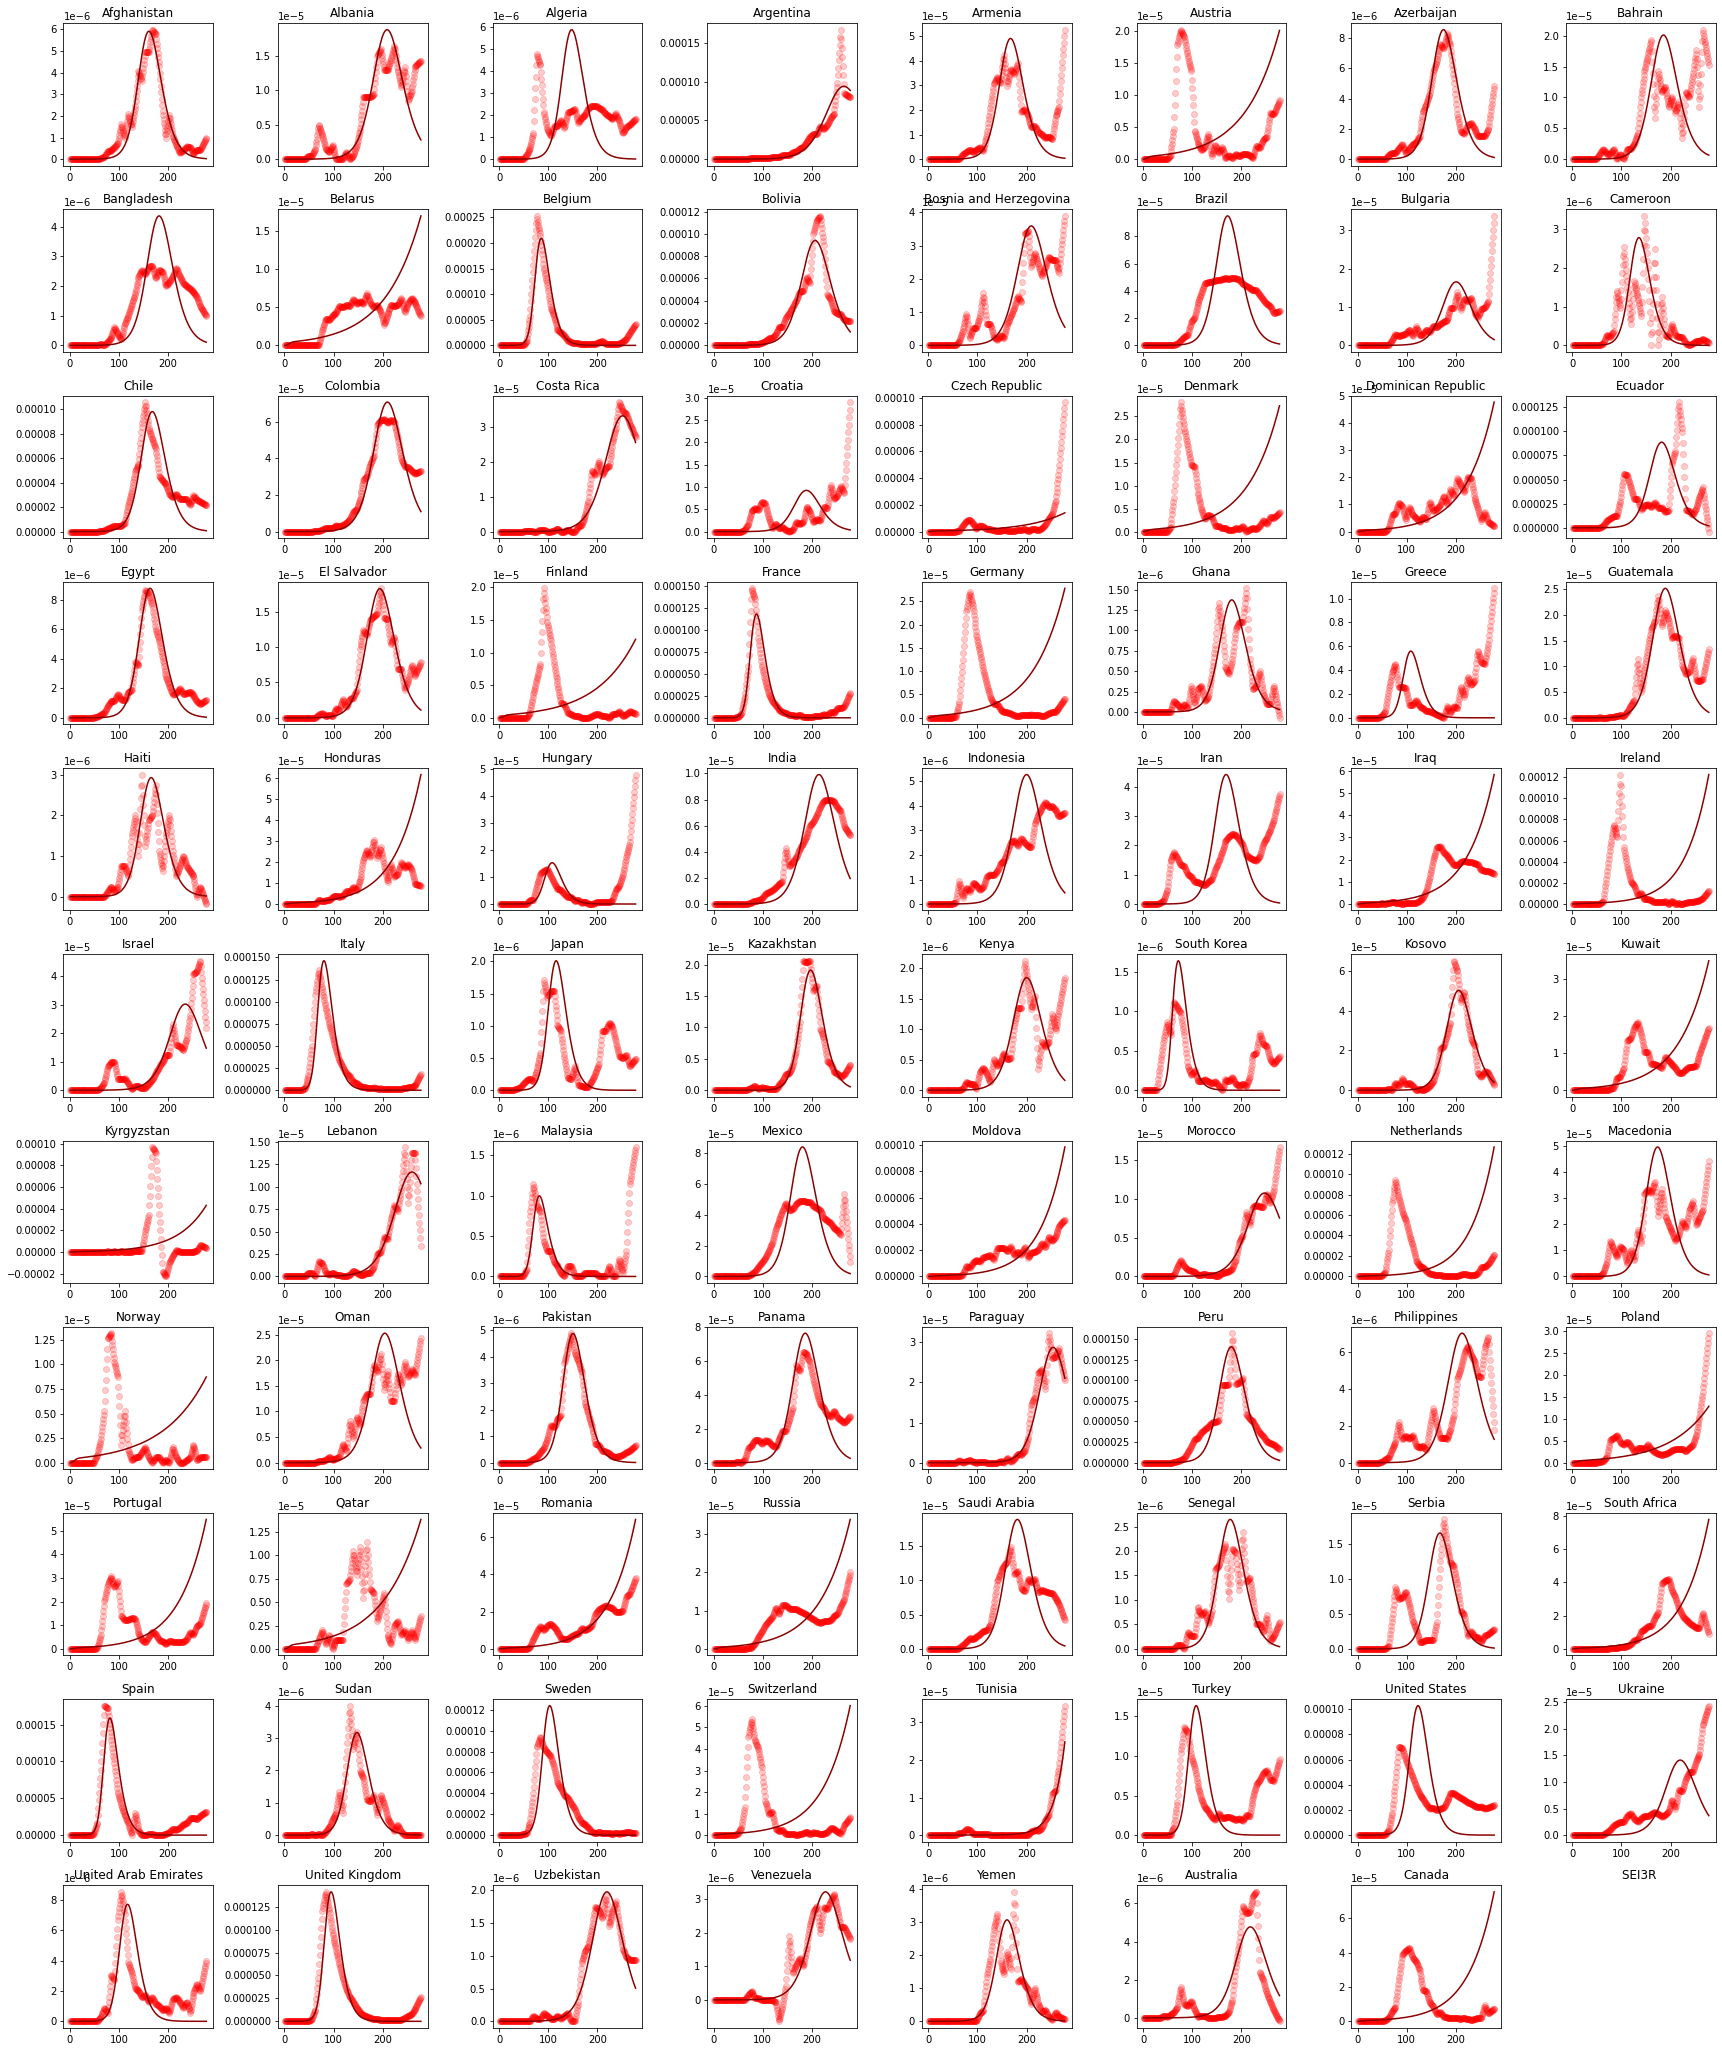

Total elapsed time for  87 countries: 303.7485930919647
Time per country: 3.4913631389881004


In [74]:
SEI3Rscan.scan()

# Scan with SC3EI3R fit

**Deaths only**

In [32]:
len(cluster_countries)

87

In [55]:
# fix caution parameters to have negligible influence, to compare with SEI3R
pinit = {"c_0": (1.0,0.999,1.0),
         "c_1": (1.0,0.999,1.0),
         "c_2": (0.0,0.0,0.001),
         "beta_1": (0.2, 0.1, 0.7),
         "mu": (.1,0.05,.2),
         "logI_0": (-6.,-10.,-5.0)}

SC3EIR3scan = Scan(countries=cluster_countries[:16],params_init_min_max=pinit, modelname='SC3EI3R',basedata=bd,data=bd.covid_owid_ts,run_id='_cluster',new=True,data_src='owid')

0 Afghanistan
1 Albania
2 Algeria
3 Argentina
4 Armenia
5 Austria
6 Azerbaijan
7 Bahrain
8 Bangladesh
9 Belarus
10 Belgium
11 Bolivia
12 Bosnia and Herzegovina
13 Brazil
14 Bulgaria
15 Cameroon


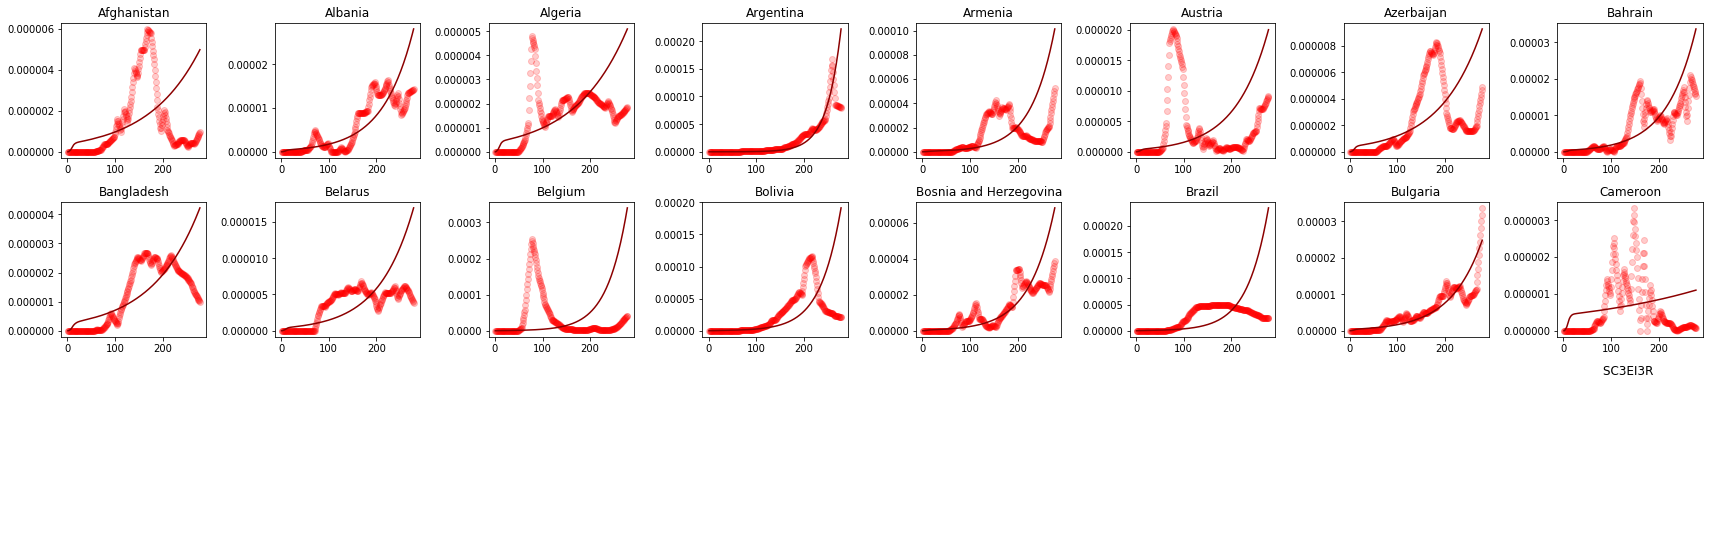

Total elapsed time for  16 countries: 20.95207667350769
Time per country: 1.3095047920942307


In [56]:
SC3EIR3scan.scan()

In [53]:
# now allow caution parameters to take on influential values
pinit_2 = {"c_0": (0.3,0.1,1.0),
         "c_1": (1.0,0.01,1.0),
         "c_2": (2.,0.1,5.0),
         "beta_1": (0.2, 0.1, 0.7),
         "mu": (.1,0.05,.2),
         "logI_0": (-6.,-10.,-5.0)}

SC3EIR3scan_2 = Scan(countries=cluster_countries[:16],params_init_min_max=pinit_2, modelname='SC3EI3R',
                     basedata=bd,data=bd.covid_owid_ts,run_id='_cluster',new=True,data_src='owid')

0 Afghanistan
1 Albania
2 Algeria
3 Argentina
4 Armenia
5 Austria
6 Azerbaijan
7 Bahrain
8 Bangladesh
9 Belarus
10 Belgium
11 Bolivia
12 Bosnia and Herzegovina
13 Brazil
14 Bulgaria
15 Cameroon


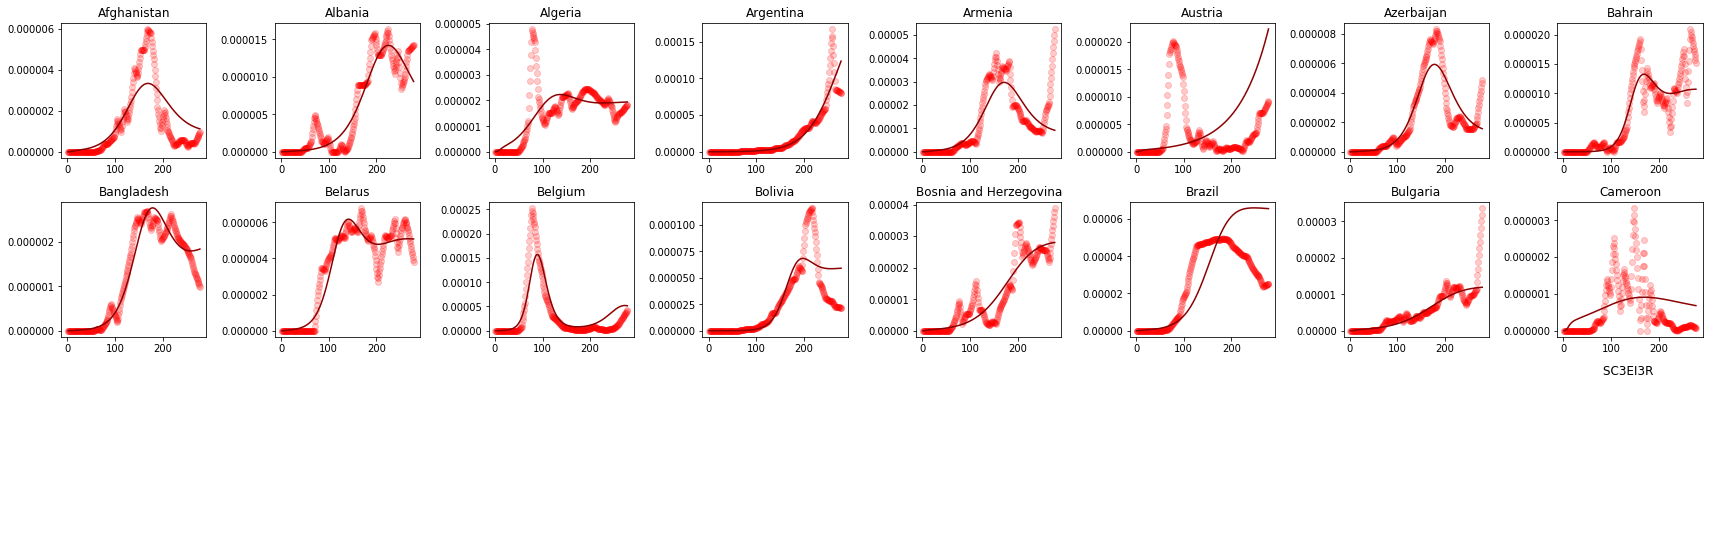

Total elapsed time for  16 countries: 60.13786005973816
Time per country: 3.758616253733635


In [54]:
SC3EIR3scan_2.scan()

In [24]:
# fix caution parameters to have negligible influence, to compare with SEI3R
pinit = {"c_0": (1.0,0.999,1.0),
         "c_1": (1.0,0.999,1.0),
         "c_2": (0.0,0.0,0.001),
         "beta_1": (0.2, 0.1, 0.7),
         "mu": (.1,0.05,.2),
         "logI_0": (-6.,-10.,-5.0)}

SC3EIR3_noC_scan = Scan(countries=cluster_countries[:4],params_init_min_max=pinit, modelname='SC3EI3R',
                        basedata=bd,data=bd.covid_owid_ts,run_id='_cluster',new=True,data_src='owid')

0 Afghanistan
1 Albania
2 Algeria
3 Argentina


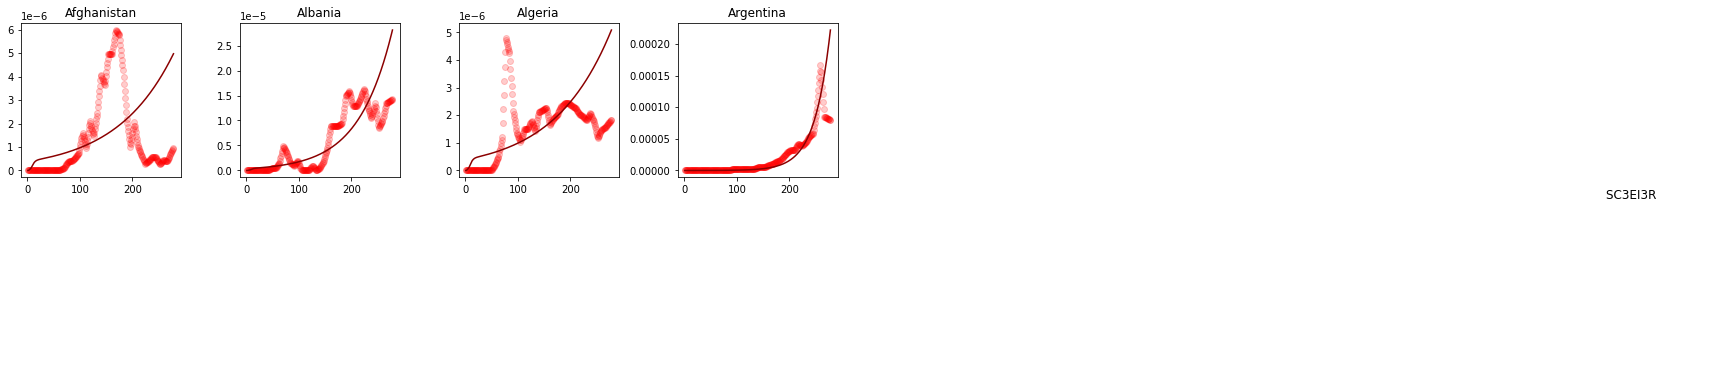

Total elapsed time for  4 countries: 72.28000378608704
Time per country: 18.07000094652176


In [25]:
SC3EIR3_noC_scan.scan()

# Test SC3EI3R vs SEI3R

Approach:
* read in fitted SEI3R params
* set SC3EI3R params to the SEI3R values
* set $c_0 = c_1 = 1$ and $c_2 = 0$ in SC3EI3R model to check dynamics with SEI3R

In [76]:
!ls -lt pks/*scan*

-rw-r--r--  1 n  staff  410544 Nov 11 01:00 pks/SEI3R_cluster_scan.pk
-rw-r--r--  1 n  staff   17658 Nov 10 13:34 pks/SC3EI3R_cluster_scan.pk
-rw-r--r--  1 n  staff   18082 Nov 10 10:14 pks/SC3EI3R_short_scan.pk


In [77]:
SEI3Rdata = pk.load(open('pks/SEI3R_cluster_scan.pk','rb'))

In [86]:
country = 'Germany'
SEI3Rparams = SEI3Rdata['params']
par_GE = SEI3Rparams[country]
par_GE['params']
par_GE['sbparams']['logI_0']

-5.000000005968514

In [89]:
country = 'Afghanistan'
SEI3Rparams = SEI3Rdata['params']
par_afghan = SEI3Rparams[country]
par_afghan['params']
par_afghan['sbparams']['logI_0']

-5.000000000013697

In [109]:
MyModel = ModelFit('SC3EI3R',basedata=bd,data=bd.covid_owid_ts,country=country,run_id="_tst",new=True,data_src='owid')

In [110]:
MyModel.params

{'beta_1': 0.4,
 'beta_2': 0.0,
 'beta_3': 0.0,
 'alpha': 0.2,
 'gamma_1': 0.06999999999999999,
 'gamma_2': 0.16666666666666669,
 'gamma_3': 0.1,
 'p_1': 0.030000000000000013,
 'p_2': 0.08333333333333333,
 'mu': 0.1,
 'c_0': 0.1,
 'c_1': 0.016666666666666666,
 'c_2': 10.0,
 'N': 1}

In [113]:
MyModel.set_param('beta_1',par_afghan['params']['beta_1'])
#MyModel.set_param('beta_1',.13)

MyModel.set_param('mu',par_afghan['params']['mu'])
MyModel.set_I0(par_afghan['sbparams']['logI_0'])
MyModel.set_param('c_0', 1.0)
MyModel.set_param('c_1', 1.0)
MyModel.set_param('c_2', 0.0)


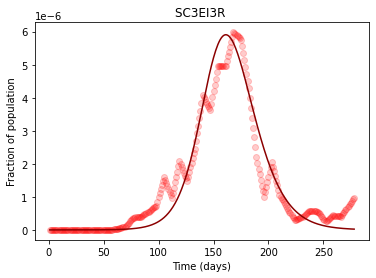

In [114]:
MyModel.solveplot(species=['deaths'],datasets=['deaths_corrected_smoothed'],newplot=False)

In [ ]:
np.log

Error:   ['deaths_corrected_smoothed'] not in data
Error:   ['confirmed_corrected_smoothed'] not in data


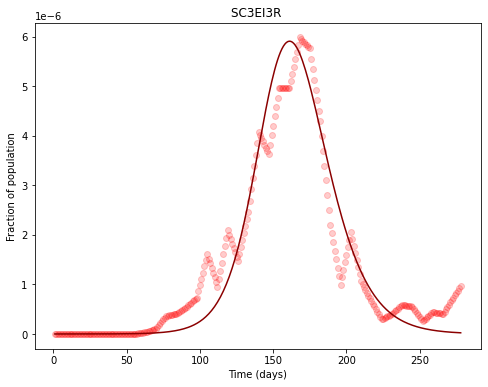

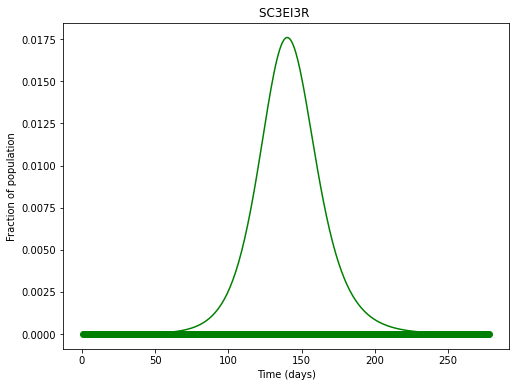

In [116]:
MyModel.solveplot('deaths',datasets=['deaths_corrected_smoothed'])
MyModel.solveplot('confirmed',datasets=['confirmed_corrected_smoothed'])

**Boo!!!!!!!!!!!!   this SC3EI3R should match up with SEIR**

In [47]:
def  print_ode2(self):
        '''
        Prints the ode in symbolic form onto the screen/console in actual
        symbols rather than the word of the symbol.
        
        Based on the PyGOM built-in but adapted for Jupyter
        Corrected by John McCaskill to avoid subscript format error
        '''
        A = self.get_ode_eqn()
        B = sympy.zeros(A.rows,2)
        for i in range(A.shape[0]):
            B[i,0] = sympy.symbols('d' + '{' + str(self._stateList[i]) + '}'+ '/dt=')
            B[i,1] = A[i]

        return B


In [48]:
print_ode2(MyModel.model)

Matrix([
[  d{S}/dt=,                  -1000.0*I_3*S*c_2 - S*(I_1*beta_1 + I_2*beta_2 + I_3*beta_3 + I_c*beta_1*c_0) + S_c*c_1],
[  d{E}/dt=,        -1000.0*E*I_3*c_2 - E*alpha + E_c*c_1 + S*(I_1*beta_1 + I_2*beta_2 + I_3*beta_3 + I_c*beta_1*c_0)],
[d{I_1}/dt=,                                           E*alpha - 1000.0*I_1*I_3*c_2 - I_1*gamma_1 - I_1*p_1 + I_c*c_1],
[d{I_2}/dt=,                                                                I_1*p_1 - I_2*gamma_2 - I_2*p_2 + I_c*p_1],
[d{I_3}/dt=,                                                                           I_2*p_2 - I_3*gamma_3 - I_3*mu],
[  d{R}/dt=,                                                    I_1*gamma_1 + I_2*gamma_2 + I_3*gamma_3 + I_c*gamma_1],
[  d{D}/dt=,                                                                                                   I_3*mu],
[d{I_c}/dt=,                                         E_c*alpha + 1000.0*I_1*I_3*c_2 - I_c*c_1 - I_c*gamma_1 - I_c*p_1],
[d{S_c}/dt=,             1000.0

In [94]:
country

'Afghanistan'

In [95]:
MySEI3R = ModelFit('SEI3R',basedata=bd,data=bd.covid_owid_ts,country=country,run_id="_tst",new=True,data_src='owid')

In [51]:
print_ode2(MySEI3R.model)

Matrix([
[  d{S}/dt=,           -S*(I_1*beta_1 + I_2*beta_2 + I_3*beta_3)],
[  d{E}/dt=, -E*alpha + S*(I_1*beta_1 + I_2*beta_2 + I_3*beta_3)],
[d{I_1}/dt=,                     E*alpha - I_1*gamma_1 - I_1*p_1],
[d{I_2}/dt=,                     I_1*p_1 - I_2*gamma_2 - I_2*p_2],
[d{I_3}/dt=,                      I_2*p_2 - I_3*gamma_3 - I_3*mu],
[  d{R}/dt=,             I_1*gamma_1 + I_2*gamma_2 + I_3*gamma_3],
[  d{D}/dt=,                                              I_3*mu]])

**Check to make sure SEI3R model with params loaded from pk file match up with scan above**

In [115]:
par_afghan['params']

{'beta_1': 0.2561158505235048,
 'beta_2': 0.0,
 'beta_3': 0.0,
 'alpha': 0.2,
 'gamma_1': 0.06999999999999999,
 'gamma_2': 0.16666666666666669,
 'gamma_3': 0.1,
 'p_1': 0.030000000000000013,
 'p_2': 0.08333333333333333,
 'mu': 4.1406295646106984e-05,
 'N': 1}

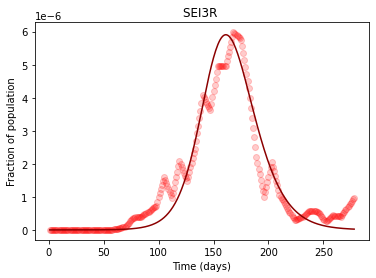

In [96]:
MySEI3R.set_param('beta_1',par_afghan['params']['beta_1'])
#MySEI3R.set_param('beta_1',.3)
MySEI3R.set_param('mu',par_afghan['params']['mu'])
MySEI3R.set_I0(par_afghan['sbparams']['logI_0'])
MySEI3R.solveplot(species=['deaths'],datasets=['deaths_corrected_smoothed'],newplot=False)

**CHECK!!!!!!!**


# Fitting base params

**Must still test with Scan class...**

In [8]:
country='Germany'
MyModel = ModelFit('SC3EI3R',basedata=bd,data=bd.covid_owid_ts,country=country,run_id="_tst",new=True,data_src='owid') # run_id labels parameter dump files



In [9]:
[x for x in dir(MyModel) if 'param' in x]

['allsliderparams',
 'baseparams',
 'cbparams',
 'dbparams',
 'dumpparams',
 'fbparams',
 'getparams',
 'loadparams',
 'params',
 'prparams',
 'sbparams',
 'set_base_param',
 'set_param',
 'transfer_fit_to_params_init']

In [10]:
MyModel.prparams()


params:
{'N': 1,
 'alpha': 0.2,
 'beta_1': 0.4,
 'beta_2': 0.0,
 'beta_3': 0.0,
 'c_0': 0.1,
 'c_1': 0.016666666666666666,
 'c_2': 10.0,
 'gamma_1': 0.06999999999999999,
 'gamma_2': 0.16666666666666669,
 'gamma_3': 0.1,
 'mu': 0.1,
 'p_1': 0.030000000000000013,
 'p_2': 0.08333333333333333}
sbparams:
{'CFR': 0.05,
 'DurHosp': 4,
 'DurMildInf': 10,
 'Exposure': 0.4,
 'FracCritical': 0.1,
 'FracMild': 0.7,
 'ICUFrac': 0.001,
 'IncubPeriod': 5,
 'TimeICUDeath': 5,
 'logI_0': -6.522878745280337}
pfbarams:
{'FracConfirmedDet': 1.0, 'FracDeathsDet': 1.0}
cbparams:
{'CautionExposure': 0.1,
 'CautionFactor': 0.1,
 'CautionRetention': 60.0,
 'EconomicCostOfCaution': 0.5,
 'EconomicRetention': 60.0,
 'EconomicStriction': 30.0,
 'EconomyRelaxation': 60.0}
dbparams:
{'country': 'Germany', 'data_src': 'owid', 'run_name': 'SC3EI3R'}
initial_values:
(array([9.999997e-01, 0.000000e+00, 3.000000e-07, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.0000

In [17]:
#  for debugging class methods without having to reload all of model_fits.py:
#  file containing only ModelFit class, 
exec(open('ModelFit.py','r').read())

## parameter setup for 3 rounds of fitting with standard values (use copy if want to edit)

In [11]:
params_init_min_max_1 = {
    'Exposure': (0.4, .05, 1.0, 0.001),
    'logI_0': (np.log10(0.0000003), -10. ,-4. , 0.001),
    'CautionFactor': (0.1, 0.01, 1.0, 0.001),
    'CautionRetention': (60 , 15, 90, 0.01 ),
    'CautionExposure': (0.1 , 0.01, 1., 0.001 ),
    'FracConfirmedDet':(0.5,0.2,1.0,0.001)
}

In [12]:
params_init_min_max_1U = {
    'Exposure': (0.4, .05, 1.0, 0.001),
    'logI_0': (np.log10(0.0000003), -10. ,-4. , 0.001),
    'CautionFactor': (0.1, 0.01, 1.0, 0.001),
    'CautionRetention': (60 , 15, 90, 0.01 ),
    'CautionExposure': (0.1 , 0.01, 1., 0.001 ),
    'FracConfirmedDet':(0.5,0.2,1.0,0.001)
}

In [13]:
params_init_min_max_2 = {
    'FracMild': (0.7,0.6,0.85,0.001),
    'FracCritical': (0.1,0.05,0.15,0.001),
    'CFR': (0.05, 0.03,0.1,0.001),
    'DurHosp': (4, 2, 8, 0.01),
    'DurMildInf': (10, 5, 20, 0.01),
    'Exposure': (0.4, .05, 1.0, 0.001),
    'logI_0': (np.log10(0.0000003), -10. ,-4. , 0.001),
    'TimeICUDeath': (5, 2, 7, 0.01),
    'CautionFactor': (0.2, 0.1, 0.3, 0.001),
    'CautionRetention': (60 , 15, 90, 0.01 ),
    'CautionExposure': (0.2 , 0.1, 1., 0.001 ),
    'FracConfirmedDet':(0.5,0.1,1.0,0.001),
    'FracDeathsDet':(1,0.3,1.0,0.001)
}

In [14]:
params_init_min_max_2U = {
    'FracMild': (0.7,0.6,0.85,0.001),
    'FracCritical': (0.1,0.05,0.15,0.001),
    'CFR': (0.05, 0.03,0.1,0.001),
    'DurHosp': (4, 2, 8, 0.01),
    'DurMildInf': (10, 5, 20, 0.01),
    'Exposure': (0.4, .05, 1.0, 0.001),
    'logI_0': (np.log10(0.0000003), -10. ,-4. , 0.001),
    'TimeICUDeath': (5, 2, 7, 0.01),
    'CautionFactor': (0.2, 0.1, 0.3, 0.001),
    'CautionRetention': (60 , 15, 90, 0.01 ),
    'CautionExposure': (0.2 , 0.1, 1., 0.001 ),
    'FracConfirmedDet':(0.5,0.1,1.0,0.001),
    'FracDeathsDet':(1,0.3,1.0,0.001),
    'EconomicRetention': (60,15,90,0.01)
}

In [15]:
params_init_min_max_3 = {
    'FracMild': (0.7,0.6,0.85,0.001),
    'FracCritical': (0.1,0.05,0.15,0.001),
    'CFR': (0.05, 0.03,0.1,0.001),
    'DurHosp': (4, 2, 8, 0.01),
    'DurMildInf': (10, 5, 20, 0.01),
    'Exposure': (0.4, .05, 1.0, 0.001),
    'logI_0': (np.log10(0.0000003), -10. ,-4. , 0.001),
    'IncubPeriod': (5, 2, 7, 0.01),
    'TimeICUDeath': (5, 2, 7, 0.01),
    'CautionFactor': (0.2, 0.1, 0.3, 0.001),
    'CautionRetention': (60 , 15, 90, 0.01 ),
    'CautionExposure': (0.2 , 0.1, 1., 0.001 ),
    'FracConfirmedDet':(0.5,0.1,1.0,0.001),
    'FracDeathsDet':(1,0.25,1.0,0.001)
}

In [16]:
params_init_min_max_3U = {
    'FracMild': (0.7,0.6,0.85,0.001),
    'FracCritical': (0.1,0.05,0.15,0.001),
    'CFR': (0.05, 0.03,0.1,0.001),
    'DurHosp': (4, 2, 8, 0.01),
    'DurMildInf': (10, 5, 20, 0.01),
    'Exposure': (0.4, .05, 1.0, 0.001),
    'logI_0': (np.log10(0.0000003), -10. ,-4. , 0.001),
    'IncubPeriod': (5, 2, 7, 0.01),
    'TimeICUDeath': (5, 2, 7, 0.01),
    'CautionFactor': (0.2, 0.1, 0.3, 0.001),
    'CautionRetention': (60 , 15, 90, 0.01 ),
    'CautionExposure': (0.2 , 0.1, 1., 0.001 ),
    'FracConfirmedDet':(0.5,0.1,1.0,0.001),
    'FracDeathsDet':(1,0.25,1.0,0.001),
    'EconomicRetention': (60,15,90,0.01),
    'EconomicStriction': (30,15,90,0.01),
    'EconomicRelaxation': (60,15,90,0.01),
    'EconomicCostOfCaution': (0.5,0.1,0.9,0.001)
}

## Example Germany

In [17]:
country = 'Germany'
###############################################
## do the fit
MyModel = ModelFit('SC3EI3R',country=country,run_id="_test3",basedata=bd,data=bd.covid_owid_ts)

loaded params from  /Users/n/Projects/covid-recovery/Notebooks/covid-19-caution/params/SC3EI3R_Germany_test3.pk :


In [18]:
MyModel.fit(params_init_min_max_1,param_class='base', fit_method='leastsq',fit_targets=['deaths','confirmed'],fit_data=['deaths_corrected_smoothed','confirmed_corrected_smoothed'])

elapsed time =  64.59226894378662
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 249
    # data points      = 558
    # variables        = 6
    chi-square         = 5.9722e-05
    reduced chi-square = 1.0819e-07
    Akaike info crit   = -8943.99885
    Bayesian info crit = -8918.05270
[[Variables]]
    Exposure:          0.34563690 +/- 0.00574597 (1.66%) (init = 0.4)
    logI_0:           -6.51383330 +/- 0.02889855 (0.44%) (init = -6.522879)
    CautionFactor:     0.20504907 +/- 0.03072930 (14.99%) (init = 0.1)
    CautionRetention:  89.9997348 +/- 3.28301898 (3.65%) (init = 60)
    CautionExposure:   0.16959815 +/- 0.01696671 (10.00%) (init = 0.1)
    FracConfirmedDet:  0.99998275 +/- 0.01150470 (1.15%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(CautionFactor, CautionExposure)     = -0.971
    C(logI_0, CautionFactor)              = -0.959
    C(Exposure, CautionExposure)          = -0.925
    C(logI_0, CautionExposure)    

In [19]:
bd.covid_owid_ts.keys()

dict_keys(['confirmed', 'deaths', 'recovered', 'tests', 'stringency', 'population', 'population_density', 'gdp_per_capita', 'new_deaths', 'new_deaths_smoothed', 'deaths_smoothed', 'new_deaths_corrected', 'new_deaths_corrected_smoothed', 'deaths_corrected_smoothed', 'new_confirmed', 'new_confirmed_smoothed', 'confirmed_smoothed', 'new_confirmed_corrected', 'new_confirmed_corrected_smoothed', 'confirmed_corrected_smoothed', 'confirmed_linr_corrected_smoothed', 'new_confirmed_nonlin_corrected_smoothed', 'confirmed_nonlin_corrected_smoothed', 'new_confirmed_nonlinr_corrected_smoothed', 'confirmed_nonlinr_corrected_smoothed'])

Error:   ['deaths_corrected_smoothed'] not in data
Error:   ['confirmed_corrected_smoothed'] not in data


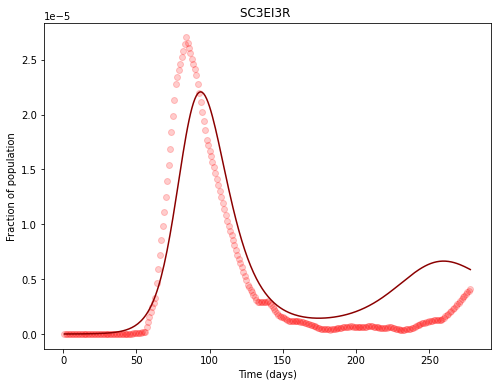

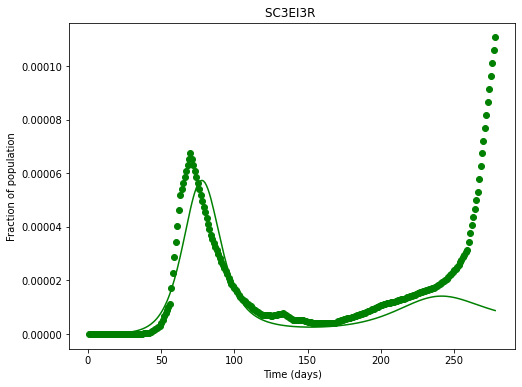

In [20]:
MyModel.solveplot('deaths',datasets=['deaths_corrected_smoothed'])
MyModel.solveplot('confirmed',datasets=['confirmed_corrected_smoothed'])

In [61]:
[x for x in MyModel.data]

['confirmed',
 'deaths',
 'tests',
 'stringency',
 'population',
 'population_density',
 'gdp_per_capita',
 'new_deaths',
 'new_deaths_smoothed',
 'deaths_smoothed',
 'new_deaths_corrected',
 'new_deaths_corrected_smoothed',
 'deaths_corrected_smoothed',
 'new_confirmed',
 'new_confirmed_smoothed',
 'confirmed_smoothed',
 'new_confirmed_corrected',
 'new_confirmed_corrected_smoothed',
 'confirmed_corrected_smoothed',
 'confirmed_linr_corrected_smoothed',
 'new_confirmed_nonlin_corrected_smoothed',
 'confirmed_nonlin_corrected_smoothed',
 'new_confirmed_nonlinr_corrected_smoothed',
 'confirmed_nonlinr_corrected_smoothed']

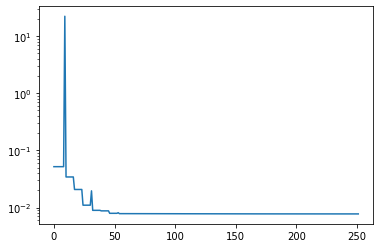

In [21]:
plt.semilogy(MyModel.residall);

In [ ]:
# the optimized parameters from stage 1 are transferred to initial values for these parameters
# in the larger set of parameters in stage 2
params_init_min_max_2 = MyModel.transfer_fit_to_params_init(params_init_min_max_2)
MyModel.fit(params_init_min_max_2,param_class='base', fit_method='nelder',fit_targets=['deaths','confirmed'],fit_data=['deaths_corrected_smoothed','confirmed_corrected_smoothed'])
MyModel.solveplot('deaths',datasets=['deaths_corrected_smoothed'])
MyModel.solveplot('confirmed',datasets=['confirmed_corrected_smoothed'])

In [ ]:
plt.semilogy(MyModel.residall);

### Death only

In [ ]:
country = 'Germany'
###############################################
## do the fit
MyModel = ModelFit('SC3EI3R',country=country,run_id="_test4")

In [ ]:
MyModel.fit(params_init_min_max_1,param_class='base', fit_method='leastsq',fit_targets=['deaths'],fit_data=['deaths_corrected_smoothed'])

In [ ]:
MyModel.solveplot('deaths',datasets=['deaths_corrected_smoothed'])
MyModel.solveplot('confirmed',datasets=['confirmed_corrected_smoothed'])

In [ ]:
plt.semilogy(MyModel.residall);

In [ ]:
# the optimized parameters from stage 1 are transferred to initial values for these parameters
# in the larger set of parameters in stage 2
params_init_min_max_2 = MyModel.transfer_fit_to_params_init(params_init_min_max_2)
MyModel.fit(params_init_min_max_2,param_class='base', fit_method='nelder',fit_targets=['deaths'],fit_data=['deaths_corrected_smoothed'])
MyModel.solveplot('deaths',datasets=['deaths_corrected_smoothed'])
MyModel.solveplot('confirmed',datasets=['confirmed_corrected_smoothed'])

In [ ]:
plt.semilogy(MyModel.residall);

### slider plot for base params

In [ ]:
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [ ]:
sliderparams = MyModel.allsliderparams(params_init_min_max_2)
if sliderparams:
    w=interactive(MyModel.slidefitplot,param_class=fixed('base'),**sliderparams)
    display(w)

In [ ]:
params_init_min_max_2_slider = params_init_min_max_2.copy()
params_init_min_max_2_slider = MyModel.transfer_fit_to_params_init(params_init_min_max_2_slider)

In [ ]:
MyModel.prparams()

### slider plot for ode params

In [ ]:
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [ ]:
# define with 4th tuple elt step size for sliders
params_init_min_max = {"beta_1": (0.487, 0., 1., 0.001),
                       "alpha": (0.2,0.,1.,0.001),
                       "mu": (0.057,0.,.2,0.001),
                       "c_0": (0.1, 0., 1.0,0.001),
                       "c_1": (0.011, 0.0, 0.5,0.001),
                       "c_2": (4.15, 2.,20.,0.01),
                       "logI_0": (-6.85,-10.,0.0, 0.01)}

In [ ]:
sliderparams = MyModel.allsliderparams(params_init_min_max)
if sliderparams:
    w=interactive(MyModel.slidefitplot,param_class=fixed('ode'),**sliderparams)
    display(w)

In [ ]:
MyModel.prparams()